In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-25 01:14:50,657 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-25 01:14:53,577 | INFO     |: Connected to C0:83:b1:6a:38:3C


D:\Workspace\ECE-5160-Sp23\ble_robot-1.1\ble_python\base_ble.py:87: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                tof  = int(data[1])
                if tof > 0:
                    tof_time_list.append(time)
                    tof_data_list.append(tof)
        else:
            # PWM
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                pwm  = int(data[1])
                if pwm > 0:
                    pwm_time_list.append(time)
                    pwm_data_list.append(pwm)

In [4]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [5]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []


In [6]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [7]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [8]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [9]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

if tof_time_list[0] > 1000:
    tof_time_list = tof_time_list/1000
    pwm_time_list = pwm_time_list/1000

In [10]:
print(tof_data_list)
print(tof_time_list)
print(pwm_data_list)
print(pwm_time_list)

[359, 360, 359, 361, 360, 359, 360, 358, 356, 358, 361, 361, 358, 361, 357, 360, 359, 358, 361, 360, 361, 359, 358, 356, 360, 360, 358, 357, 358, 360, 361, 359, 359, 358, 358, 359, 358, 362, 361, 357, 360, 359, 358, 358, 358, 359, 358, 359, 357, 357, 357, 357, 360, 361, 359, 358, 358, 358, 360, 362, 358, 359, 359, 357, 360, 361, 360, 360, 358, 361]
[0, 106, 224, 332, 447, 562, 656, 773, 869, 987, 1087, 1199, 1293, 1417, 1520, 1633, 1729, 1844, 1939, 2060, 2152, 2266, 2358, 2478, 2567, 2686, 2778, 2892, 2990, 3103, 3199, 3323, 3422, 3537, 3632, 3747, 3848, 3957, 4053, 4166, 4265, 4375, 4472, 4590, 4688, 4807, 4902, 5009, 5110, 5216, 5312, 5427, 5519, 5633, 5727, 5843, 5935, 6052, 6142, 6259, 6351, 6470, 6562, 6679, 6772, 6883, 6983, 7099, 7197, 7311]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 106, 224, 332, 447, 562, 

In [ ]:
import pickle
file = open('tof_data_var.pkl', 'wb')
pickle.dump(tof_data_list, file)
file.close()
file = open('tof_time_var.pkl', 'wb')
pickle.dump(tof_time_list, file)
file.close()

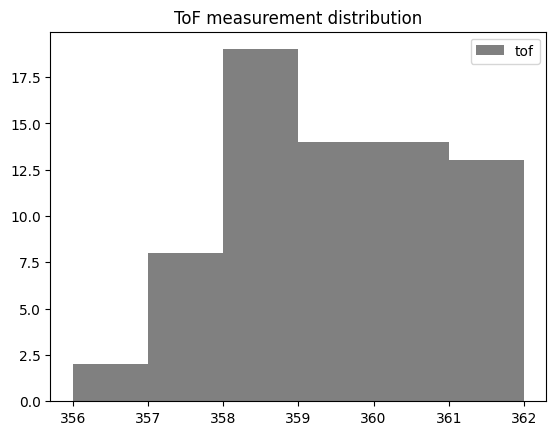

In [24]:
plt.hist(tof_data_list,bins=6,color='gray', label='tof')
plt.legend(loc="upper right")
plt.title("ToF measurement distribution")
plt.show()

In [28]:
var = np.var(tof_data_list)
print(var)
rate = np.average(np.diff(tof_time_list))
print(rate)

2.0712244897959184
105.95652173913044


In [ ]:
if pwm_data_list[0] != 0:
    pwm_data_list[0] = 0

plt.plot(pwm_time_list, pwm_data_list, color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('pwm')
plt.show()

In [ ]:
delta = abs(np.diff(tof_data_list)/np.diff(tof_time_list)) * 1000
plt.plot(tof_time_list[1:], delta)

In [32]:
tof_data_list = [2019, 2011, 2008, 2001, 1968, 1934, 1881, 1846, 1799, 1742, 1672, 1612, 1506, 1415, 1304, 1218, 1122, 1025, 926, 821, 716, 612, 520, 449, 391, 344, 306, 283, 269, 262, 264, 265, 267, 268, 272, 275, 280, 286, 292]
tof_time_list = [0, 0.065, 0.136, 0.205, 0.267, 0.331, 0.396, 0.462, 0.526, 0.588, 0.651, 0.715, 0.781, 0.848, 0.911, 0.975, 1.037, 1.102, 1.166, 1.232, 1.301, 1.378, 1.446, 1.51, 1.576, 1.641, 1.71, 1.774, 1.84,  1.905, 1.971, 2.037, 2.113, 2.179, 2.249, 2.317, 2.381, 2.447, 2.508]
pwm_data_list = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

file = open('tof_data_run.pkl', 'wb')
pickle.dump(tof_data_list, file)
file.close()
file = open('tof_time_run.pkl', 'wb')
pickle.dump(tof_time_list, file)
file.close()
file = open('pwm_data_run.pkl', 'wb')
pickle.dump(pwm_data_list, file)
file.close()
